In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Data Description:
The data correspods to a very basic classification task of weather a costumer buys a credit card based on his other banking features. The data's information entropy will be analysed later but for now we get into the features. The features involved are:
* ID
* Age
* Experience
* Income
* ZIP Code
* Family
* CCAvg
* Education
* Mortgage
* Personal Loan
* Securities Account
* CD Account
* Online
* CreditCard

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend.plotting as mlp

# Information Entropy:
For analysing the entropy and distribution of the data we can simply first look at the set and analyse the skew features, hommogenity and median description information

In [ ]:

df = pd.read_csv("../input/svm-classification/UniversalBank.csv")

In [ ]:
df.head()

This is the first 5 rows just to get a grasp of the types and shape of the data we have, to get a closer input on the shape

# Information Entropy:

In [ ]:
df.shape

5000 rows of 14 features each.

In [ ]:
df.info()


This is the basic mode of analysing the type of values in the data.

In [ ]:
df.describe()

With this table we get not only the mean standard deviation etc but most importantly the quater wise median analysis. These medians show the distribution on different quaters of the data with respect to the median and provide an immediate idea regarding the **SKEWNESS**

# SKEWNESS:
This is the often forgotten handy tool for every data analyst. It explains the shift of the data towards a motion for instance if the mean is greater than 50% of the median which implies that the peak or the mean will rise after the 50% median line of the data. lets dwel further into this concept:

## The percentages:
* The percentages in the describe tables tell us that on x% stage what is the value.
* Hence at 25% stage we find the value of the median of the upper quadrant and so on

## EXAMPLE:
Lets consider he feature of "Income"  what do we find as the median i.e. 50% level is as 64 and the mean is 73.77 the this implies tthat the data is right skewed an hence that the data will be favoured at the later stage of the data. 

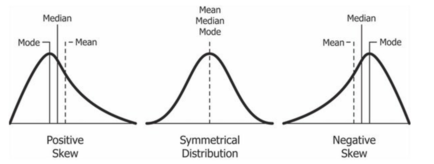

May be this helps.

Coming back to our own data we find that mostly all of our features are center skewed and even if there is some deviation its nominal. 

But for the sake of univariate analysis we will be going through the line plots of each feature. so if you havea clear understanding of the skew analysis already you might as well skip through this part

In [ ]:
X = df.iloc[:,1:13].values
y = df.iloc[:, -1].values

# Missing Values:
> Just a simple plot to check the missing values in the features.

In [ ]:
import missingno as msno
p = msno.bar(df)

As all the graphs have maximum output number 5000 they don't have any missing values.

# Univariate Analysis:

In [ ]:
p = sns.lineplot(x =X[:, 0], y = y, data = df)


In [ ]:
p = sns.lineplot(x =X[:, 1], y = y, data = df)


In [ ]:
p = sns.lineplot(x =X[:, 2], y = y, data = df)


In [ ]:
p = sns.lineplot(x =X[:, 3], y = y, data = df)


In [ ]:
p = sns.lineplot(x =X[:, 4], y = y, data = df)


In [ ]:
p = sns.lineplot(x =X[:, 5], y = y, data = df)


In [ ]:
p = sns.lineplot(x =X[:, 6], y = y, data = df)


In [ ]:
p = sns.lineplot(x =X[:, 7], y = y, data = df)


In [ ]:
p = sns.lineplot(x =X[:, 8], y = y, data = df)


In [ ]:
p = sns.lineplot(x =X[:, 9], y = y, data = df)


In [ ]:
p = sns.lineplot(x =X[:, 10], y = y, data = df)


In [ ]:
p = sns.lineplot(x =X[:, 11], y = y, data = df)


## Here the analysis of every feature shows that every single feature has more or less centre skewness and the variation the the data with non binary values is high. Thus forming the need for optimizing the trade off

# Bivariate Analysis:

In [ ]:
p = sns.pairplot(data = df)


The diagonal graphs simply give us the feature histograms that define the feature distribution. And the other graphs simply show the division of the plots and scatter of each feature with another. This plotting is again somewhat vague and difficult to understand. So we go on with heatmmap.

In [ ]:
cols = ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online']

In [ ]:
cm = np.corrcoef(df[cols].values.T)

In [ ]:
from mlxtend.plotting import heatmap
hm = heatmap(cm, column_names=cols, row_names=cols, figsize = (25, 25))

> Mostly all the heatmaps use the pearson correlation coefficient in the rankings; It is the ranks between -1 to 1, it defines the relation or the co relation between the features itself, the very basis of bivariate analysis. Thus we work upon this state and find the relations but ultimately to avoid overfitting we will be using the PCA model itself. So based on the heatmap given above and the pearson ranking we find that the maximum relation is between personal loan and income as one set and CCAvg and income, Thus its as expected there is going to be the third highest ranking between the non common denominator that is CCAvg and Personal Loan. Also keeping the most obvious one aside the age and experience relation, it is related by an index of 0.99. 

# Data Preprocessing

## Train Test Split

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Feature Selection

> The basic logic is to reduce overfitting and select only the needed components. This is performed by running the code again and again till finding the best value of n_components. I won'tbe including that in the notebook as there is going to be hyperparameter grid search already and this adding on the grid parametrs will make computation extensively long. to avoid any such case I have performed it earlier and recieved maximum accuracy with all the parameters. Hence i will just be includeing the code here and not in a kerel <code> from sklearn.decomposition import PCA
pca  = PCA(n_components = 12)
X_train= pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_</code>

# Modelling.
> I will be using SVM for this dataset

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

### As visible I have not used any parameter except the basic kernel we will be optimizing the result later using hyperparameter tuning.

**Prediction matrix.**

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
y_pred

### Using the KFold validation technique on the test set:

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

For now we have an estimate of about 74.58% we will be improving the result by grid search

## Hyper Parameter Optimization:
> For this method I will be using the grid search method.

## The following code is extensive and long thus just the refered end results are used

After using and fitting the best possible parameters we find out the k cross accuracy and hance draw an inference. The default parameters of the rbf kernel turn out to be the best possible parametrs for the case. We will then use the confusion matrix to get the type 1 and type 2 false cases:
<code>
    from sklearn.model_selection import GridSearchCV as gcv
parameter = [{'C':[1, 10, 100], 'kernel':['linear']},
              {'C':[1, 10, 100], 'kernel':['rbf', 'sigmoid', 'poly'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8,  0.9]}]
grid = gcv(estimator = classifier, param_grid = parameter , scoring = 'accuracy', n_jobs = -1, cv = 10)
grid.fit(X_train, y_train)
params = grid.best_params_
score = grid.best_score_
</code>

In [ ]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, y_pred)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix as pcm
p = pcm(conf_mat = cmatrix, cmap = 'winter_r', figsize = (5, 5))

## Instance wise accuracy:
> **The accuracy dependent upon confusion matrix:
It is not as reliable as k cross or f1 but stil can be used for calulations**

In [ ]:
((871+56)/1250)*100

#### The confusion matrix based accuracy is 74.16%


## KFold

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

#### The K cross accuracy is : 74.58 percent

## Final plotfor the accuracy confusion matrix:


In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# Inference:
**From the above plots, models and matrices we can arrive at the following conclusions:**
## Information Entropy:
> With the above skewness and mean plots we find out that the data is centrally skewed and variance of the independent features are pretty high which can be expected in a large dataset. Thus feature selection is a need.
## Feature Analysis:
> The feature analysis is basically pretty straight forward and we will be using all the 12 features for the data  as the PCA gave us the best accuracy with 12 features thus providing the best possible accuracy
## Model Selection:
> The model used in this feature is SVM model as the maximum accuuracy acquired is by a support vector.
## Hyperparameter Optimization:
> After applying the grid search we ind that the c= 1 and gamma as auto and rbf kernel is the best possible model
## Final Accuracy:
> After applying the instances accuracy we find that the accuracy calculated is 74.16% and the k cross accuracy is 74.58%.
## Silver Lining:
> The normlized matrix straight away shows that the model is better at calculating the data near the mean area and makes errors of type 2 category. The model's performance is in average looking at the noise in data and the variance a 75 to 80 percent model is well suited.